In [1]:

#Check TF version
import tensorflow as tf
print(tf.__version__)


2.3.0


In [2]:
# Is GPU enabled
if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Fix it")

Default GPU Device:/device:GPU:0


In [3]:

from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, \
  Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import earthpy as et 

In [4]:
## Code needed to set a new working directory

#my_path = os.path.join(et.io.HOME, 'recommender_system')
#os.mkdir(my_path)

## Set Working Directory
os.chdir(os.path.join("/home/ckamerin/Documents/GitHub", 'recommender_system'))

In [5]:
# Check if it worked
os.getcwd()

'/home/ckamerin/Documents/GitHub/recommender_system'

In [6]:
# Data Import
df = pd.read_csv("/home/ckamerin/Desktop/headphone_df_cleaned.csv")

In [7]:
df = df.sample(frac=1).reset_index(drop=True)


In [8]:
df.columns

Index(['headphone_name', 'travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use', 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set'],
      dtype='object')

In [9]:
X=df[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use']]
y=df[[ 'wireless', 'noise_cancelling',
       'mic_presence', 'frequency_response_consistency', 'bass_accuracy',
       'mid_accuracy', 'treble_accuracy', 'peaks_dips', 'imaging',
       'passive_soundstage', 'weighted_harmonic_distortion', 'noise_isolation',
       'microphone_rating', 'mic_recording_quality', 'bluetooth',
       'closed_back', 'open_back', 'in_ear', 'on_ear', 'over_ear', 'head_set']]

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
x1_train, x1_test, y1_train, y1_test = y_train, y_test, X_train, X_test

In [12]:
# Put models in a dictionary
models = {"KNN": KNeighborsRegressor(),
          'KNN Multi' : MultiOutputRegressor(KNeighborsRegressor()),
          "Random Forest": RandomForestRegressor(),
          "Random Forest Multi": MultiOutputRegressor(RandomForestRegressor()),
          "Linear Regression": LinearRegression(),
          "Linear Regression Multi": MultiOutputRegressor(LinearRegression()),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Decision Tree Multi': MultiOutputRegressor(DecisionTreeRegressor()),
          'Ridge Regressor Chain': RegressorChain(Ridge()),
          'Ridge Regresor Multioutput': MultiOutputRegressor(Ridge())
          }
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores



In [13]:
#Test all models on one dataset
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.5905140291566418,
 'KNN Multi': 0.5905140291566418,
 'Random Forest': 0.5734439698279027,
 'Random Forest Multi': 0.5651452969197815,
 'Linear Regression': 0.47934978233055375,
 'Linear Regression Multi': 0.4793497823305536,
 'Decision Tree Regression': 0.26974009679650635,
 'Decision Tree Multi': 0.27989634603915786,
 'Ridge Regressor Chain': 0.4864184370986558,
 'Ridge Regresor Multioutput': 0.4864184370986558}

In [14]:
model_scores = fit_and_score(models=models,
                             X_train=x1_train,
                             X_test=x1_test,
                             y_train=y1_train,
                             y_test=y1_test)
model_scores

{'KNN': 0.8646729795491298,
 'KNN Multi': 0.86467297954913,
 'Random Forest': 0.8949359585809928,
 'Random Forest Multi': 0.9397966589309137,
 'Linear Regression': 0.9651547435977124,
 'Linear Regression Multi': 0.9651547435977124,
 'Decision Tree Regression': 0.8138771405260712,
 'Decision Tree Multi': 0.8900236081540435,
 'Ridge Regressor Chain': 0.9601850081854095,
 'Ridge Regresor Multioutput': 0.9601850081854095}

In [73]:
np.random.seed(42)
ANN = tf.keras.models.Sequential([
  tf.keras.layers.Dense(108, input_dim = 5, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(512, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(.1),
  tf.keras.layers.Dense(21, activation= 'linear')
])

In [74]:
opt = tf.keras.optimizers.Adam(.00001)
mae = tf.keras.losses.MeanAbsoluteError()
ANN.compile(optimizer=opt,metrics=['accuracy'],loss='mse')


In [78]:
hp_model=ANN.fit(x=X_train,y=y_train, validation_data = (X_test, y_test), epochs=1000 ,batch_size = 16)
#hp_model=ANN.fit(x=x1_train,y=y1_train, validation_data = (x1_test, y1_test), epochs=100 ,batch_size = 16)

2783 - val_loss: 0.0284 - val_accuracy: 0.3276
Epoch 863/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.2913 - val_loss: 0.0281 - val_accuracy: 0.3448
Epoch 864/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.2696 - val_loss: 0.0282 - val_accuracy: 0.2931
Epoch 865/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.2304 - val_loss: 0.0283 - val_accuracy: 0.2931
Epoch 866/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.2304 - val_loss: 0.0283 - val_accuracy: 0.3276
Epoch 867/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.2870 - val_loss: 0.0282 - val_accuracy: 0.3103
Epoch 868/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.2522 - val_loss: 0.0283 - val_accuracy: 0.3103
Epoch 869/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0193 - accu

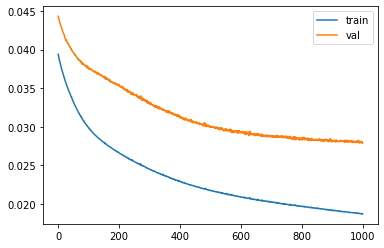

In [79]:
plt.plot(hp_model.history['loss'],label='loss')
plt.plot(hp_model.history['val_loss'],label='val_loss')
plt.legend(['train','val'])

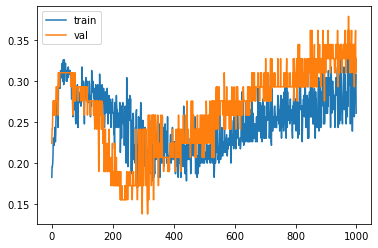

In [80]:
plt.plot(hp_model.history['accuracy'],label='accuracy')
plt.plot(hp_model.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','val'])

In [81]:
userlist = np.array([[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

In [82]:
userinputs = pd.DataFrame(data=userlist,columns = df.columns )

In [83]:
userinputs

,headphone_name,travel_use,exercise_use,office_use,phone_call_use,studio_use,wireless,noise_cancelling,mic_presence,frequency_response_consistency,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_pred=userinputs[['travel_use', 'exercise_use', 'office_use',
       'phone_call_use', 'studio_use']]

In [87]:
y_pred=ANN.predict(X_pred)

In [89]:
preddf = pd.DataFrame(data=y_pred, columns =y.columns)


In [90]:
preddf

,wireless,noise_cancelling,mic_presence,frequency_response_consistency,bass_accuracy,mid_accuracy,treble_accuracy,peaks_dips,imaging,passive_soundstage,...,noise_isolation,microphone_rating,mic_recording_quality,bluetooth,closed_back,open_back,in_ear,on_ear,over_ear,head_set
0,-0.016776,0.020949,0.005787,0.587179,0.759229,0.955679,0.827104,0.766097,0.952037,0.954433,...,0.100247,0.013820,-0.008892,-0.024984,-0.085242,0.946452,-0.079391,-0.023296,1.167795,-0.012708
1,0.252200,0.311826,0.439308,0.404044,0.457811,0.463478,0.361945,0.350752,0.772856,0.222543,...,0.857711,0.215861,0.241123,0.285338,1.207193,-0.187462,0.498295,-0.003833,0.380540,0.079303
2,0.608479,0.028453,0.617572,0.599528,0.086758,0.448785,0.548246,0.353490,0.640690,0.382410,...,-0.114482,0.358950,0.304242,0.473204,0.534326,0.338366,0.856009,-0.195017,0.009466,0.291997
3,0.210062,0.345237,0.190384,0.072365,0.410475,0.455836,0.394831,0.272560,0.523886,0.366718,...,0.536851,0.047373,0.048073,0.118014,0.769799,-0.054551,-0.094327,-0.095899,0.885120,0.097081
4,-0.292078,0.126778,1.050231,0.059655,0.517307,0.292714,0.255851,0.225777,0.918159,0.546128,...,0.662513,0.961707,0.942288,0.123519,1.173506,-0.006536,0.160752,-0.004026,0.933312,-0.002652
